# 데이터 불러오기

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print (X_train.shape)

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print (X_train.shape)
print (X_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000, 784)
(10000, 784)


In [2]:
random.seed(100)
X_list = [[],[],[],[],[],[],[],[],[],[]]

for i in range(len(X_train)):
    if y_train[i] == 0:
        X_list[0].append(X_train[i])
    elif y_train[i] == 1:
        X_list[1].append(X_train[i])
    elif y_train[i] == 2:
        X_list[2].append(X_train[i])
    elif y_train[i] == 3:
        X_list[3].append(X_train[i])
    elif y_train[i] == 4:
        X_list[4].append(X_train[i])
    elif y_train[i] == 5:
        X_list[5].append(X_train[i])
    elif y_train[i] == 6:
        X_list[6].append(X_train[i])
    elif y_train[i] == 7:
        X_list[7].append(X_train[i])
    elif y_train[i] == 8:
        X_list[8].append(X_train[i])
    elif y_train[i] == 9:
        X_list[9].append(X_train[i])
        
#X
for i in range(10):
    X_list[i] = random.sample(X_list[i], 100)

new_X_train = np.concatenate(X_list, axis=0)
print("숫자당 100개를 랜덤 추출하여 1000개 이미지 저장 :", new_X_train.shape)

#y
y_list = []
for i in range(10):
    y_list.append([i]*100)

new_y_train = np.concatenate(y_list, axis=0)
print("new_y_train :", new_y_train.shape)

숫자당 100개를 랜덤 추출하여 1000개 이미지 저장 : (1000, 784)
new_y_train : (1000,)


# 이미지 비주얼 함수

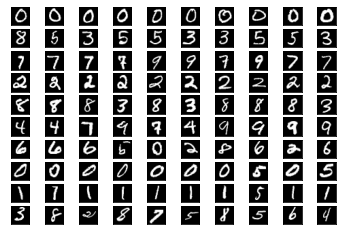

In [178]:
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(new_X_train)
y_pred = model.labels_

def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(new_X_train[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()
    
viz_img(y_pred)

In [179]:
new_X_train.dtype

dtype('float32')

# 1번

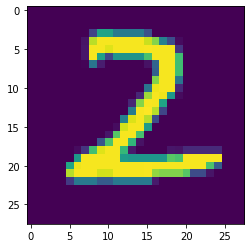

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [3]:
plt.imshow(X_list[2][5].reshape(28, 28))
plt.show()

print(y_list[2])

In [4]:
#변수 저장
X_Digit_2 = X_list[2]
y_Digit_2 = y_list[2]

print(len(X_Digit_2))
print(len(y_Digit_2))

100
100


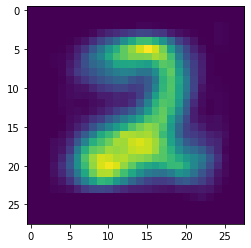

In [5]:
#mean image
import numpy as np

mean_img_list = []
empty_list = []
mean = 0

for i in range(784):
    for k in range(100):
        empty_list.append(X_Digit_2[k][i])
    mean = np.mean(empty_list)
    mean_img_list.append(mean)
    empty_list = []
    
mean_img_list = np.reshape(mean_img_list,(28,28))
plt.imshow(mean_img_list, cmap='viridis')
plt.show()

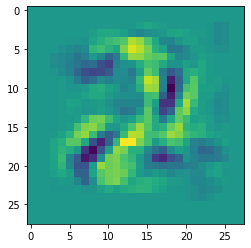

In [6]:
#PCA eigen(pca를 차원축소만 했는데 recover함수 써서 다시 고차원으로 높이면 명확해짐.)
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_Digit_2)

# 고유벡터 = Eigenvector : 축에 투영시 반영되는 방향 벡터값
e = pca.components_
eigen_list = pca.components_[9]

# 고유값 = Eigenvalue : 설명 정도
# 두번째 주성분의 고유값
#print(pca.explained_variance_ratio_[3])

#print(pca.singular_values_)
#pca = decomposition.PCA(n_components=2).fit(X_Digit_2)
#reduced_X = pca.transform(X_Digit_2)
#print(len(reduced_X))

eigen_list = np.reshape(eigen_list,(28,28))
plt.imshow(eigen_list, cmap='viridis')
plt.show()

In [12]:
print(e.shape)
print(eigen_list.shape)

(10, 784)
(28, 28)


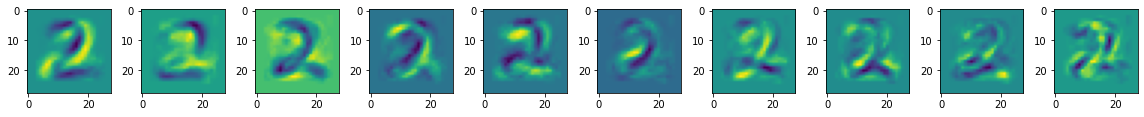

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_Digit_2)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    eigen_list = pca.components_[i]
    eigen_list = np.reshape(eigen_list,(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

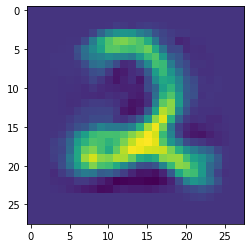

(100, 10)
(100, 784)


In [8]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_Digit_2)

#10차원으로 줄인 것을 다시 784로 복구(압축 후 복원 느낌/6월2일 고유벡터 블로그 참조)
X_recovered = pca.inverse_transform(X_reduced)

eigen_list = np.reshape(X_recovered[9],(28,28))
plt.imshow(eigen_list)
plt.show()


print(X_reduced.shape)
print(X_recovered.shape)

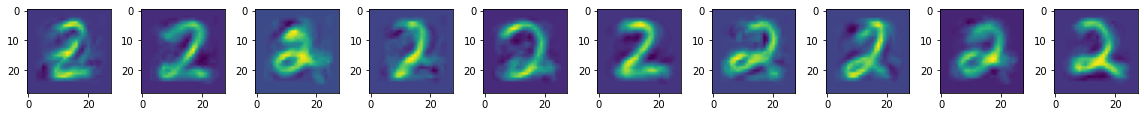

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_Digit_2)
X_recovered = pca.inverse_transform(X_reduced)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    #eigen_list = pca.components_[i]
    eigen_list = np.reshape(X_recovered[i],(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

In [133]:
#plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

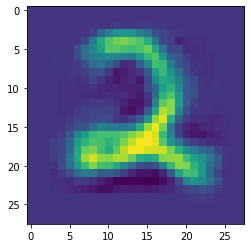

In [199]:
#Kernel PCA(linear)
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='linear')
X_reduced_k = k_pca.fit_transform(X_Digit_2)
X_recovered_k = pca.inverse_transform(X_reduced_k)

eigen_list_k = np.reshape(X_recovered_k[9],(28,28))
plt.imshow(eigen_list_k)
plt.show()

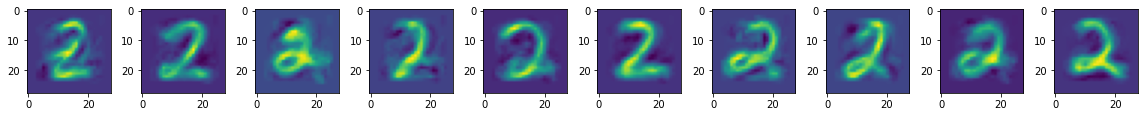

In [197]:
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='linear')
X_reduced_k = k_pca.fit_transform(X_Digit_2)
X_recovered_k = pca.inverse_transform(X_reduced_k)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    #eigen_list = pca.components_[i]
    eigen_list = np.reshape(X_recovered_k[i],(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

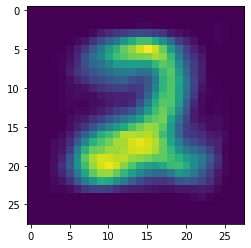

In [200]:
#Kernel PCA(rbf)
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='rbf')
X_reduced_k = k_pca.fit_transform(X_Digit_2)
X_recovered_k = pca.inverse_transform(X_reduced_k)

eigen_list_k = np.reshape(X_recovered_k[9],(28,28))
plt.imshow(eigen_list_k)
plt.show()

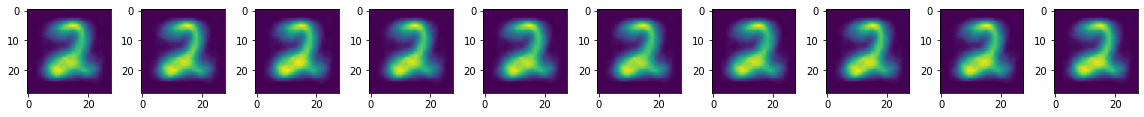

In [198]:
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='rbf')
X_reduced_k = k_pca.fit_transform(X_Digit_2)
X_recovered_k = pca.inverse_transform(X_reduced_k)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    #eigen_list = pca.components_[i]
    eigen_list = np.reshape(X_recovered_k[i],(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

In [161]:
from sklearn.preprocessing import StandardScaler

transformer = KernelPCA(n_components=10, kernel='linear')
X_transformed = transformer.fit_transform(X_Digit_2)

i = transformer.inverse_transform(X_transformed)

print(len(X_Digit_2[1]))
print(X_transformed.shape)
print(i.shape)

NotFittedError: The fit_inverse_transform parameter was not set to True when instantiating and hence the inverse transform is not available.

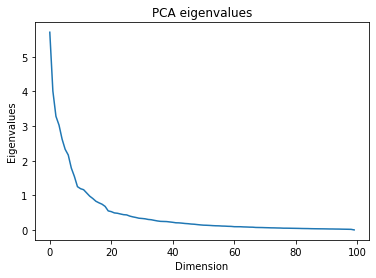

In [54]:
#Plot the eigenvalues (in  decreasing order) as a function of dimension.
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=100)
pca.fit(X_Digit_2)

# 고유값 = Eigenvalue : 설명 정도
e_val = pca.explained_variance_
e_val.sort()
e_val=e_val[::-1]

plt.plot(e_val)
plt.title("PCA eigenvalues")
plt.xlabel('Dimension')
plt.ylabel('Eigenvalues')
plt.show()

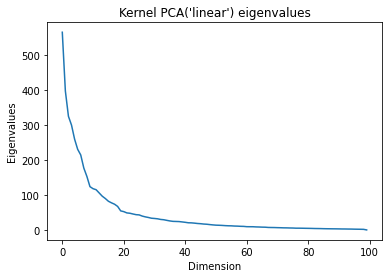

In [55]:
#Plot the eigenvalues (in  decreasing order) as a function of dimension.
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=100, kernel='linear')
k_pca.fit(X_Digit_2)

# 고유값 = Eigenvalue : 설명 정도
e_val = k_pca.eigenvalues_
e_val.sort()
e_val=e_val[::-1]

plt.plot(e_val)
plt.title("Kernel PCA('linear') eigenvalues")
plt.xlabel('Dimension')
plt.ylabel('Eigenvalues')
plt.show()

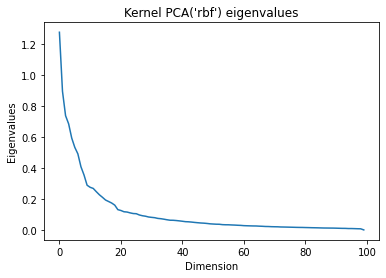

In [56]:
#Plot the eigenvalues (in  decreasing order) as a function of dimension.
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=100, kernel='rbf')
k_pca.fit(X_Digit_2)

# 고유값 = Eigenvalue : 설명 정도
e_val = k_pca.eigenvalues_
e_val.sort()
e_val=e_val[::-1]

plt.plot(e_val)
plt.title("Kernel PCA('rbf') eigenvalues")
plt.xlabel('Dimension')
plt.ylabel('Eigenvalues')
plt.show()

# 2번

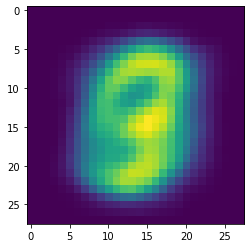

In [130]:
#mean image
import numpy as np

mean_img_list = []
empty_list = []
mean = 0

for i in range(784):
    for k in range(1000):
        empty_list.append(new_X_train[k][i])
    mean = np.mean(empty_list)
    mean_img_list.append(mean)
    empty_list = []
    
mean_img_list = np.reshape(mean_img_list,(28,28))
plt.imshow(mean_img_list)
plt.show()

(1000, 784)
(10, 784)


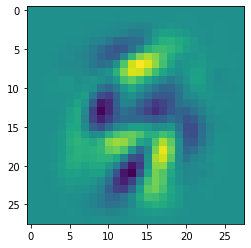

In [211]:
#PCA eigen(pca를 차원축소만 했는데 recover함수 써서 다시 고차원으로 높이면 명확해짐.)
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(new_X_train)

# 고유벡터 = Eigenvector : 축에 투영시 반영되는 방향 벡터값
e = pca.components_
eigen_list = pca.components_[9]

# 고유값 = Eigenvalue : 설명 정도
# 두번째 주성분의 고유값
#print(pca.explained_variance_ratio_[3])

#print(pca.singular_values_)
#pca = decomposition.PCA(n_components=2).fit(X_Digit_2)
#reduced_X = pca.transform(X_Digit_2)
#print(len(reduced_X))

print(new_X_train.shape)
print(e.shape)

eigen_list = np.reshape(eigen_list,(28,28))
plt.imshow(eigen_list)
plt.show()

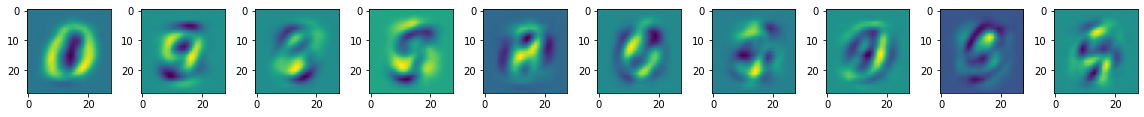

In [200]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(new_X_train)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    eigen_list = pca.components_[i]
    eigen_list = np.reshape(eigen_list,(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

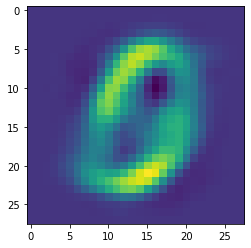

(1000, 10)
(1000, 784)


In [8]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(new_X_train)

#10차원으로 줄인 것을 다시 784로 복구(압축 후 복원 느낌/6월2일 고유벡터 블로그 참조)
X_recovered = pca.inverse_transform(X_reduced)

eigen_list = np.reshape(X_recovered[9],(28,28))
plt.imshow(eigen_list)
plt.show()


print(X_reduced.shape)
print(X_recovered.shape)

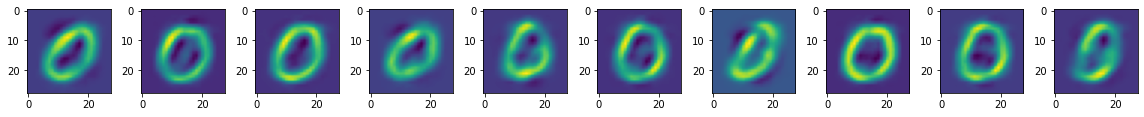

In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(new_X_train)
X_recovered = pca.inverse_transform(X_reduced)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    #eigen_list = pca.components_[i]
    eigen_list = np.reshape(X_recovered[i],(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

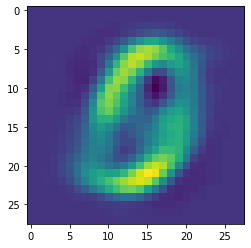

In [9]:
#Kernel PCA(linear)
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='linear')
X_reduced_k = k_pca.fit_transform(new_X_train)
X_recovered_k = pca.inverse_transform(X_reduced_k)

eigen_list_k = np.reshape(X_recovered_k[9],(28,28))
plt.imshow(eigen_list_k)
plt.show()

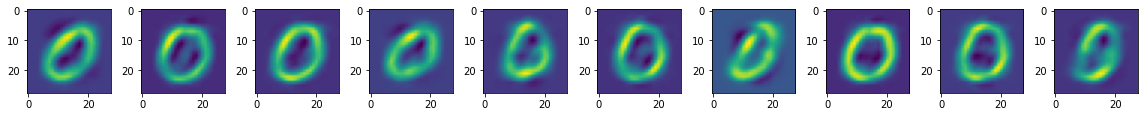

In [203]:
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='linear')
X_reduced_k = k_pca.fit_transform(new_X_train)
X_recovered_k = pca.inverse_transform(X_reduced_k)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    #eigen_list = pca.components_[i]
    eigen_list = np.reshape(X_recovered_k[i],(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

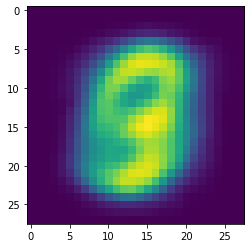

In [10]:
#Kernel PCA(linear)
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='rbf')
X_reduced_k = k_pca.fit_transform(new_X_train)
X_recovered_k = pca.inverse_transform(X_reduced_k)

eigen_list_k = np.reshape(X_recovered_k[9],(28,28))
plt.imshow(eigen_list_k)
plt.show()

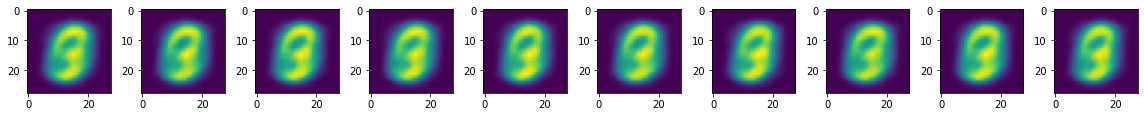

In [204]:
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=10, kernel='rbf')
X_reduced_k = k_pca.fit_transform(new_X_train)
X_recovered_k = pca.inverse_transform(X_reduced_k)

fig = plt.figure(figsize=(16, 16))
rows = 1; cols = 10

for i in range(10):
    #eigen_list = pca.components_[i]
    eigen_list = np.reshape(X_recovered_k[i],(28,28))
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(eigen_list, cmap='viridis')

fig.tight_layout()
plt.show()

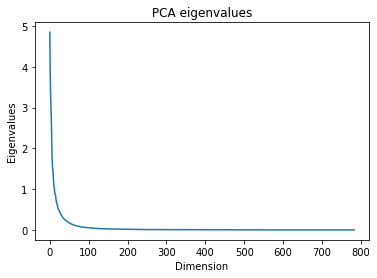

In [59]:
#Plot the eigenvalues (in  decreasing order) as a function of dimension.
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
pca.fit(new_X_train)

# 고유값 = Eigenvalue : 설명 정도
e_val = pca.explained_variance_
e_val.sort()
e_val=e_val[::-1]

plt.plot(e_val)
plt.title("PCA eigenvalues")
plt.xlabel('Dimension')
plt.ylabel('Eigenvalues')
plt.show()

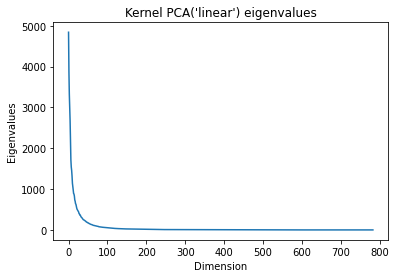

In [57]:
#Plot the eigenvalues (in  decreasing order) as a function of dimension.
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=784, kernel='linear')
k_pca.fit(new_X_train)

# 고유값 = Eigenvalue : 설명 정도
e_val = k_pca.eigenvalues_
e_val.sort()
e_val=e_val[::-1]

plt.plot(e_val)
plt.title("Kernel PCA('linear') eigenvalues")
plt.xlabel('Dimension')
plt.ylabel('Eigenvalues')
plt.show()

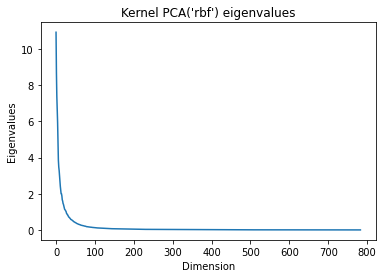

In [60]:
#Plot the eigenvalues (in  decreasing order) as a function of dimension.
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=784, kernel='rbf')
k_pca.fit(new_X_train)

# 고유값 = Eigenvalue : 설명 정도
e_val = k_pca.eigenvalues_
e_val.sort()
e_val=e_val[::-1]

plt.plot(e_val)
plt.title("Kernel PCA('rbf') eigenvalues")
plt.xlabel('Dimension')
plt.ylabel('Eigenvalues')
plt.show()

# 3번

In [11]:
print(new_X_train.shape)

(1000, 784)


In [205]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import mutual_info_score

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(new_X_train)

Kmeans = KMeans(n_clusters=10).fit_predict(X_reduced)

print("pca k-means clustering rand_score:", rand_score(new_y_train, Kmeans))
print("pca k-means clustering mutual_info_score:", mutual_info_score(new_y_train, Kmeans))

pca k-means clustering rand_score: 0.8862302302302302
pca k-means clustering mutual_info_score: 1.211053320889433


In [48]:
print(X_reduced.shape)

(1000, 10)


In [211]:
k_pca = KernelPCA(n_components=10, kernel='linear')
X_reduced_k = k_pca.fit_transform(new_X_train)

Kmeans = KMeans(n_clusters=10).fit_predict(X_reduced_k)

print("k-pca('linear') k-means clustering rand_score:", rand_score(new_y_train, Kmeans))
print("k-pca('linear') k-means clustering mutual_info_score:", mutual_info_score(new_y_train, Kmeans))

k-pca('linear') k-means clustering rand_score: 0.8885745745745746
k-pca('linear') k-means clustering mutual_info_score: 1.2068145063458482


In [212]:
k_pca = KernelPCA(n_components=10, kernel='rbf')
X_reduced_k = k_pca.fit_transform(new_X_train)

Kmeans = KMeans(n_clusters=10).fit_predict(X_reduced_k)

print("k-pca('rbf')k-means clustering rand_score:", rand_score(new_y_train, Kmeans))
print("k-pca('rbf')k-means clustering mutual_info_score:", mutual_info_score(new_y_train, Kmeans))

k-pca('rbf')k-means clustering rand_score: 0.8787987987987989
k-pca('rbf')k-means clustering mutual_info_score: 1.1229970393757178


# 4번

In [52]:
#기존 과제 3번 xxxxxx 이거 말고 과제 3에 제출한거 쓰자

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(new_X_train, new_y_train)
knn_test = knn.predict(X_test)
score = classification_report(knn_test, y_test)
print(score)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1027
           1       1.00      0.88      0.93      1289
           2       0.85      0.96      0.90       912
           3       0.86      0.84      0.85      1031
           4       0.86      0.88      0.87       960
           5       0.82      0.82      0.82       890
           6       0.94      0.93      0.94       971
           7       0.91      0.86      0.88      1085
           8       0.77      0.91      0.83       826
           9       0.83      0.83      0.83      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [54]:
print(new_X_train.shape)
print(X_reduced.shape)
print(new_y_train.shape)

(1000, 784)
(1000, 10)
(1000,)


In [88]:
#pca 1-nn score

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(new_X_train)
X_reduced_test = pca.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_reduced, new_y_train)
knn_test = knn.predict(X_reduced_test)
score = classification_report(knn_test, y_test)
print(score)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1036
           1       0.16      0.53      0.24       340
           2       0.27      0.27      0.27      1029
           3       0.08      0.08      0.08      1014
           4       0.03      0.03      0.03       959
           5       0.48      0.37      0.41      1162
           6       0.58      0.61      0.59       904
           7       0.24      0.25      0.24       993
           8       0.27      0.17      0.21      1559
           9       0.02      0.02      0.02      1004

    accuracy                           0.28     10000
   macro avg       0.29      0.30      0.28     10000
weighted avg       0.30      0.28      0.28     10000



In [58]:
#k-pca 1-nn score

k_pca = KernelPCA(n_components=10, kernel='rbf')
X_reduced_k = k_pca.fit_transform(new_X_train)
X_reduced_k_test = k_pca.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_reduced_k, new_y_train)
knn_test = knn.predict(X_reduced_k_test)
score = classification_report(knn_test, y_test)
print(score)

              precision    recall  f1-score   support

           0       0.70      0.58      0.63      1192
           1       0.02      0.21      0.04       111
           2       0.07      0.05      0.05      1489
           3       0.07      0.08      0.08       952
           4       0.01      0.01      0.01       722
           5       0.32      0.27      0.29      1057
           6       0.25      0.27      0.26       894
           7       0.16      0.16      0.16      1061
           8       0.23      0.16      0.19      1383
           9       0.00      0.00      0.00      1139

    accuracy                           0.18     10000
   macro avg       0.18      0.18      0.17     10000
weighted avg       0.21      0.18      0.19     10000



# 5번

In [158]:
def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(X_recovered[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()

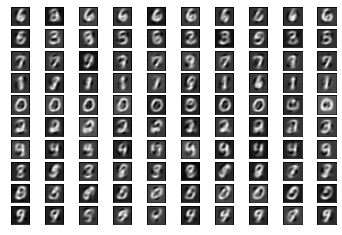

In [159]:
import numpy as np

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(new_X_train)
X_recovered = pca.inverse_transform(X_reduced)

Kmeans = KMeans(n_clusters=10)
Kmeans.fit_predict(X_recovered)

y_pred = Kmeans.labels_
#print(y_pred)
viz_img(y_pred)

In [160]:
print(y_pred.shape)
print(new_y_train.shape)

(1000,)
(1000,)


In [161]:
y_pred

array([8, 4, 4, 8, 4, 4, 8, 4, 4, 1, 8, 8, 4, 4, 8, 0, 8, 8, 8, 8, 1, 4,
       4, 4, 8, 0, 8, 8, 8, 4, 4, 8, 8, 4, 8, 8, 8, 8, 1, 8, 4, 4, 4, 8,
       4, 4, 8, 8, 4, 0, 4, 7, 4, 4, 8, 8, 8, 1, 4, 4, 4, 4, 8, 4, 8, 8,
       4, 8, 4, 4, 4, 8, 8, 8, 4, 4, 4, 4, 4, 0, 4, 8, 4, 8, 8, 4, 7, 4,
       4, 4, 8, 8, 8, 4, 4, 4, 4, 8, 4, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5,
       5, 3, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 2, 5, 0, 5, 5, 5, 5, 0, 5, 5,
       0, 5, 3, 5, 3, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 1, 5, 5, 3, 5, 5, 5,
       5, 7, 5, 5, 5, 3, 5, 1, 5, 5, 5, 5, 5, 5, 5, 0, 5, 3, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 1,

In [162]:
def list_chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

y_pred = list_chunk(y_pred, 100)
print(y_pred)



[array([8, 4, 4, 8, 4, 4, 8, 4, 4, 1, 8, 8, 4, 4, 8, 0, 8, 8, 8, 8, 1, 4,
       4, 4, 8, 0, 8, 8, 8, 4, 4, 8, 8, 4, 8, 8, 8, 8, 1, 8, 4, 4, 4, 8,
       4, 4, 8, 8, 4, 0, 4, 7, 4, 4, 8, 8, 8, 1, 4, 4, 4, 4, 8, 4, 8, 8,
       4, 8, 4, 4, 4, 8, 8, 8, 4, 4, 4, 4, 4, 0, 4, 8, 4, 8, 8, 4, 7, 4,
       4, 4, 8, 8, 8, 4, 4, 4, 4, 8, 4, 8]), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]), array([1, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 3,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 2, 5, 0, 5, 5, 5, 5, 0, 5, 5, 0, 5,
       3, 5, 3, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 1, 5, 5, 3, 5, 5, 5, 5, 7,
       5, 5, 5, 3, 5, 1, 5, 5, 5, 5, 5, 5, 5, 0, 5, 3, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0,

In [163]:
#최빈값으로 채워주기
from collections import Counter

y_list = []
for i in range(10):
    cnt = Counter(y_pred[i])
    mode = cnt.most_common()
    for i in range(100):
        y_list.append(mode[0][0])

print((y_list))

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [164]:
y_pred

[array([8, 4, 4, 8, 4, 4, 8, 4, 4, 1, 8, 8, 4, 4, 8, 0, 8, 8, 8, 8, 1, 4,
        4, 4, 8, 0, 8, 8, 8, 4, 4, 8, 8, 4, 8, 8, 8, 8, 1, 8, 4, 4, 4, 8,
        4, 4, 8, 8, 4, 0, 4, 7, 4, 4, 8, 8, 8, 1, 4, 4, 4, 4, 8, 4, 8, 8,
        4, 8, 4, 4, 4, 8, 8, 8, 4, 4, 4, 4, 4, 0, 4, 8, 4, 8, 8, 4, 7, 4,
        4, 4, 8, 8, 8, 4, 4, 4, 4, 8, 4, 8]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([1, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 3,
        5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 2, 5, 0, 5, 5, 5, 5, 0, 5, 5, 0, 5,
        3, 5, 3, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 1, 5, 5, 3, 5, 5, 5, 5, 7,
        5, 5, 5, 3, 5, 1, 5, 5, 5, 5, 5, 5, 5, 0, 5, 3, 1, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 

In [ ]:
#plot correct 3개
n = 3
fig = plt.figure(1)
box_index = 1
for cluster in range(10):
    result = np.where(y_pred == cluster)
    print(result)
    for i in np.random.choice(result[0].tolist(), n, replace=False):
        ax = fig.add_subplot(10, n, box_index)
        plt.imshow(X_recovered[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        box_index += 1
plt.show()

for i in range(3):
    
    for k in range(10):
    result = np.where(y_pred == cluster)

In [155]:
def viz_img(y_pred):    
    #plot
    n = 3
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        print(result)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(10, n, box_index)
            plt.imshow(X_recovered[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()

(array([103, 105, 108, 109, 110, 111, 112, 113, 115, 117, 118, 119, 121,
       122, 124, 125, 128, 129, 131, 132, 133, 134, 135, 138, 139, 140,
       141, 143, 144, 146, 148, 149, 150, 151, 152, 153, 155, 156, 157,
       158, 159, 161, 162, 163, 164, 168, 169, 172, 174, 175, 176, 177,
       178, 181, 182, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195,
       197, 198, 221, 246, 269, 300, 338, 348, 372, 384, 408, 410, 416,
       433, 464, 502, 511, 527, 531, 536, 537, 539, 541, 546, 551, 559,
       565, 570, 572, 579, 582, 596, 599, 602, 624, 627, 642, 646, 662,
       665, 667, 672, 679, 683, 689, 692, 693, 698, 701, 721, 735, 742,
       759, 763, 781, 795, 825, 836, 860, 868, 869, 881, 908, 914, 935,
       959, 988], dtype=int64),)
(array([201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215,
       216, 217, 219, 220, 222, 223, 224, 226, 227, 228, 229, 230, 231,
       233, 235, 236, 237, 238, 240, 241, 243, 245, 247, 248, 249, 250,
       252, 253, 254, 255, 25

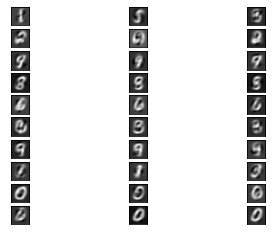

In [156]:
import numpy as np

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(new_X_train)
X_recovered = pca.inverse_transform(X_reduced)

Kmeans = KMeans(n_clusters=10)
Kmeans.fit_predict(X_recovered)

y_pred = Kmeans.labels_
#print(y_pred)
viz_img(y_pred)